In [1]:
import sys
sys.path.append("../..")

import gempy as gp
import numpy as np
import matplotlib.pyplot as plt
import os

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
from gempy.core.data import Grid

In [3]:
grid = Grid()

In [4]:
grid.grid_active

array([ True, False, False, False])

In [20]:
grid.grid_types

array(['regular', 'custom', 'topography', 'gravity'], dtype='<U10')

In [5]:
grid.values

array([], shape=(0, 3), dtype=float64)

In [10]:
grid.set_regular_grid([0,100,0,100,-100,0], [20,20,20])

In [11]:
grid.values

array([[  2.5,   2.5, -97.5],
       [  2.5,   2.5, -92.5],
       [  2.5,   2.5, -87.5],
       ...,
       [ 97.5,  97.5, -12.5],
       [ 97.5,  97.5,  -7.5],
       [ 97.5,  97.5,  -2.5]])

In [12]:
grid.grid_active

array([ True, False, False, False])

In [13]:
grid.length

array([   0, 8000, 8000, 8000, 8000])

In [24]:
l0, l1 = grid.get_grid_args('topography')

In [25]:
grid.values[l0: l1]

array([], shape=(0, 3), dtype=float64)

Now we set topography

showing...


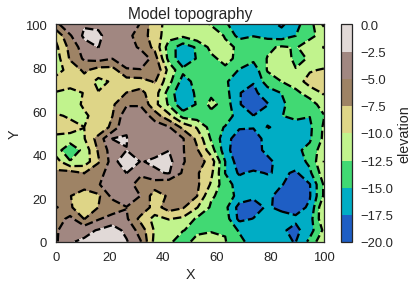

In [26]:
grid.set_topography()

In [9]:
grid.length[np.where(grid.grid_types == 'regular')[0]]

array([0])

In [27]:
grid.length

array([   0, 8000, 8000, 8400, 8400])

In [14]:
grid.values

array([[  2.5       ,   2.5       , -97.5       ],
       [  2.5       ,   2.5       , -92.5       ],
       [  2.5       ,   2.5       , -87.5       ],
       ...,
       [ 87.5       ,  97.5       , -10.56931929],
       [ 92.5       ,  97.5       ,  -6.50528339],
       [ 97.5       ,  97.5       ,  -3.41716475]])

In [32]:
grid.deactivate_all_grids()
grid.update_grid_values()

In [34]:
grid.set_active('topography')

In [37]:
grid.set_active('regular')

In [38]:
grid.values.shape

(8400, 3)